In [1]:
%pip install surprise
%pip install --upgrade surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811585 sha256=6dac9501e3fe97474e6325d891c56c26bc42e36fb670ba64b43c02826ec47b16
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [102]:
pip install scikit-surprise


In [2]:
# Define a function to plot confusion matrices
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [117]:
import pandas as pd
import pylab as pl
import nltk
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
import pickle
from surprise import Reader, Dataset
from surprise.model_selection import  cross_validate
from surprise import SVD
from surprise import accuracy


In [4]:
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")
print(stopwords.words('english'))
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
df1 = pd.read_csv('movies_metadata.csv')

In [6]:
df1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
df1['year'] = pd.to_datetime(df1['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


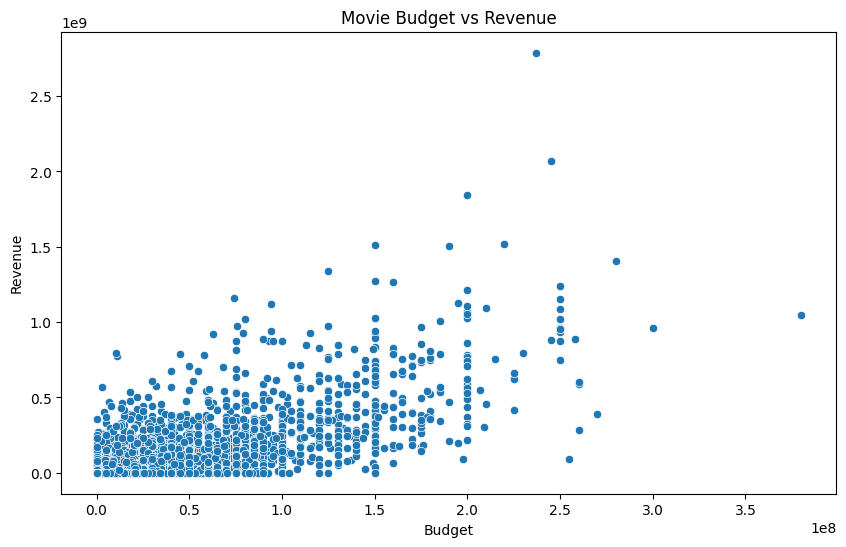

In [8]:
df1['budget'] = pd.to_numeric(df1['budget'], errors='coerce')
df1['revenue'] = pd.to_numeric(df1['revenue'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='budget', y='revenue')
plt.title('Movie Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


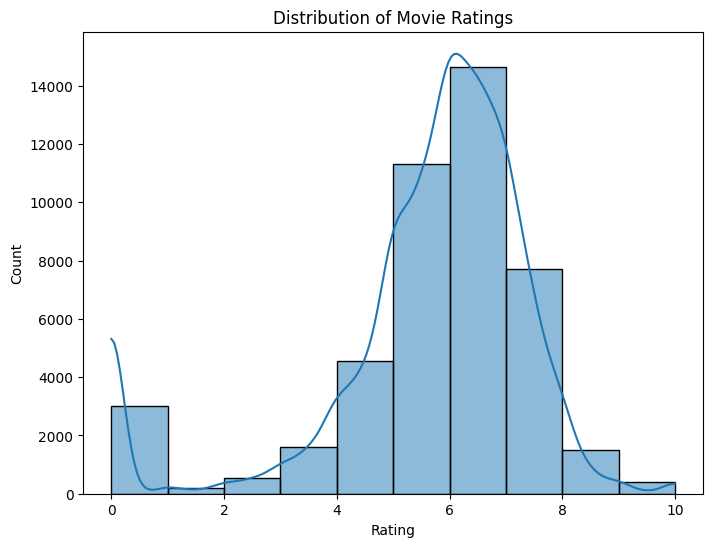

In [9]:
df1['vote_average'] = pd.to_numeric(df1['vote_average'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='vote_average', bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


<Axes: >

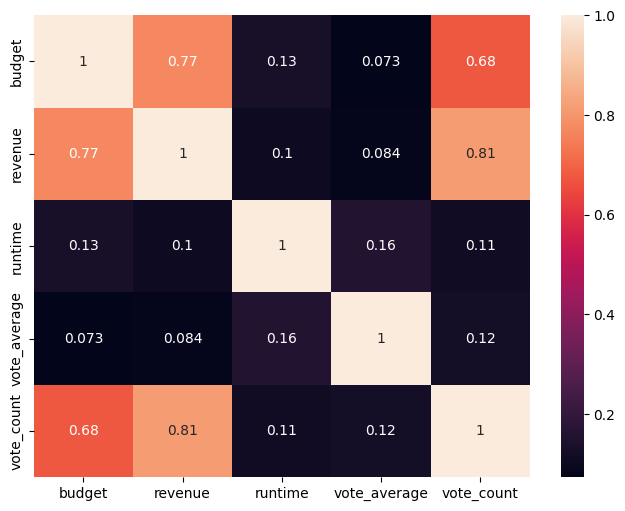

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True)

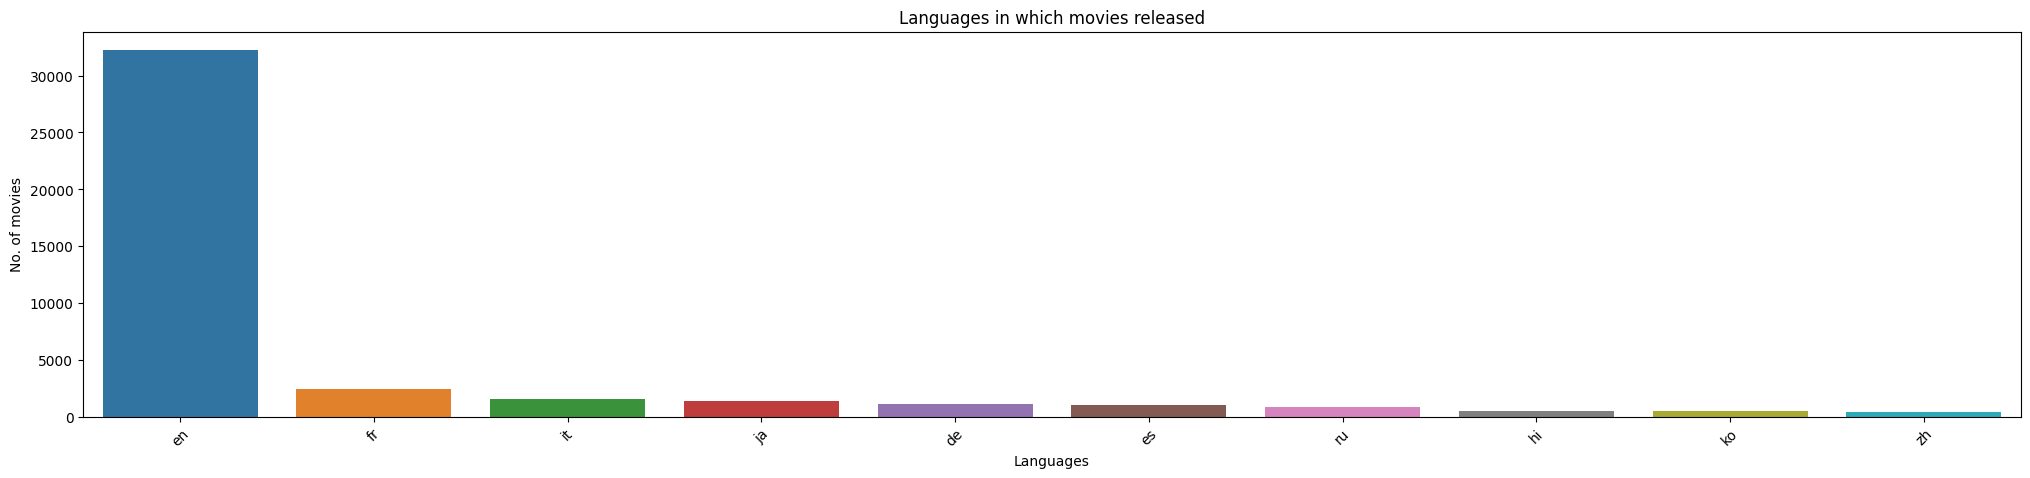

In [11]:
lang_name = df1['original_language'].value_counts().index.tolist()[0:10]
lang_count = df1['original_language'].value_counts().tolist()[0:10]

fig = plt.figure(figsize = (25, 5))
sns.barplot(x=lang_name,y=lang_count)
plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title('Languages in which movies released')
plt.show()

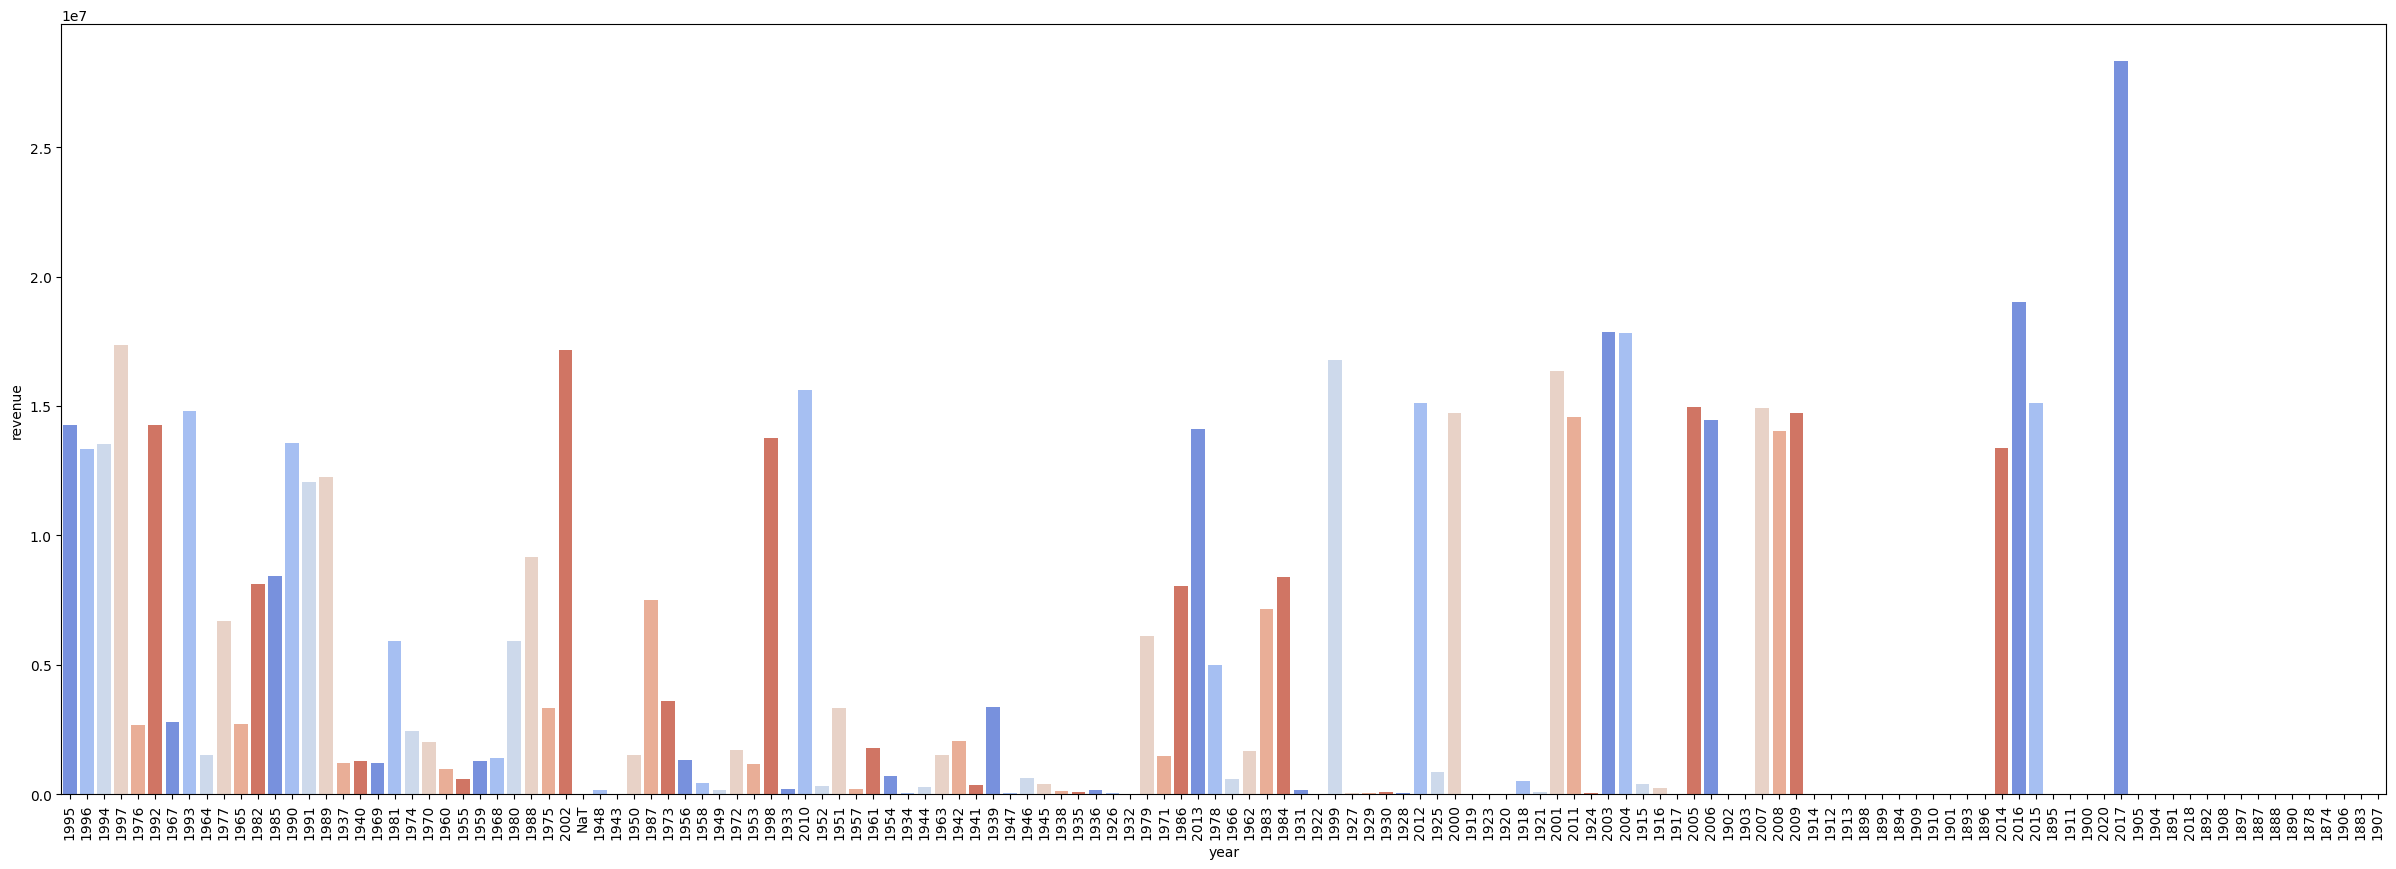

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(data = df1, x='year',y='revenue',errorbar=None, palette = sns.color_palette("coolwarm"))
plt.xticks(rotation=90)
plt.show()

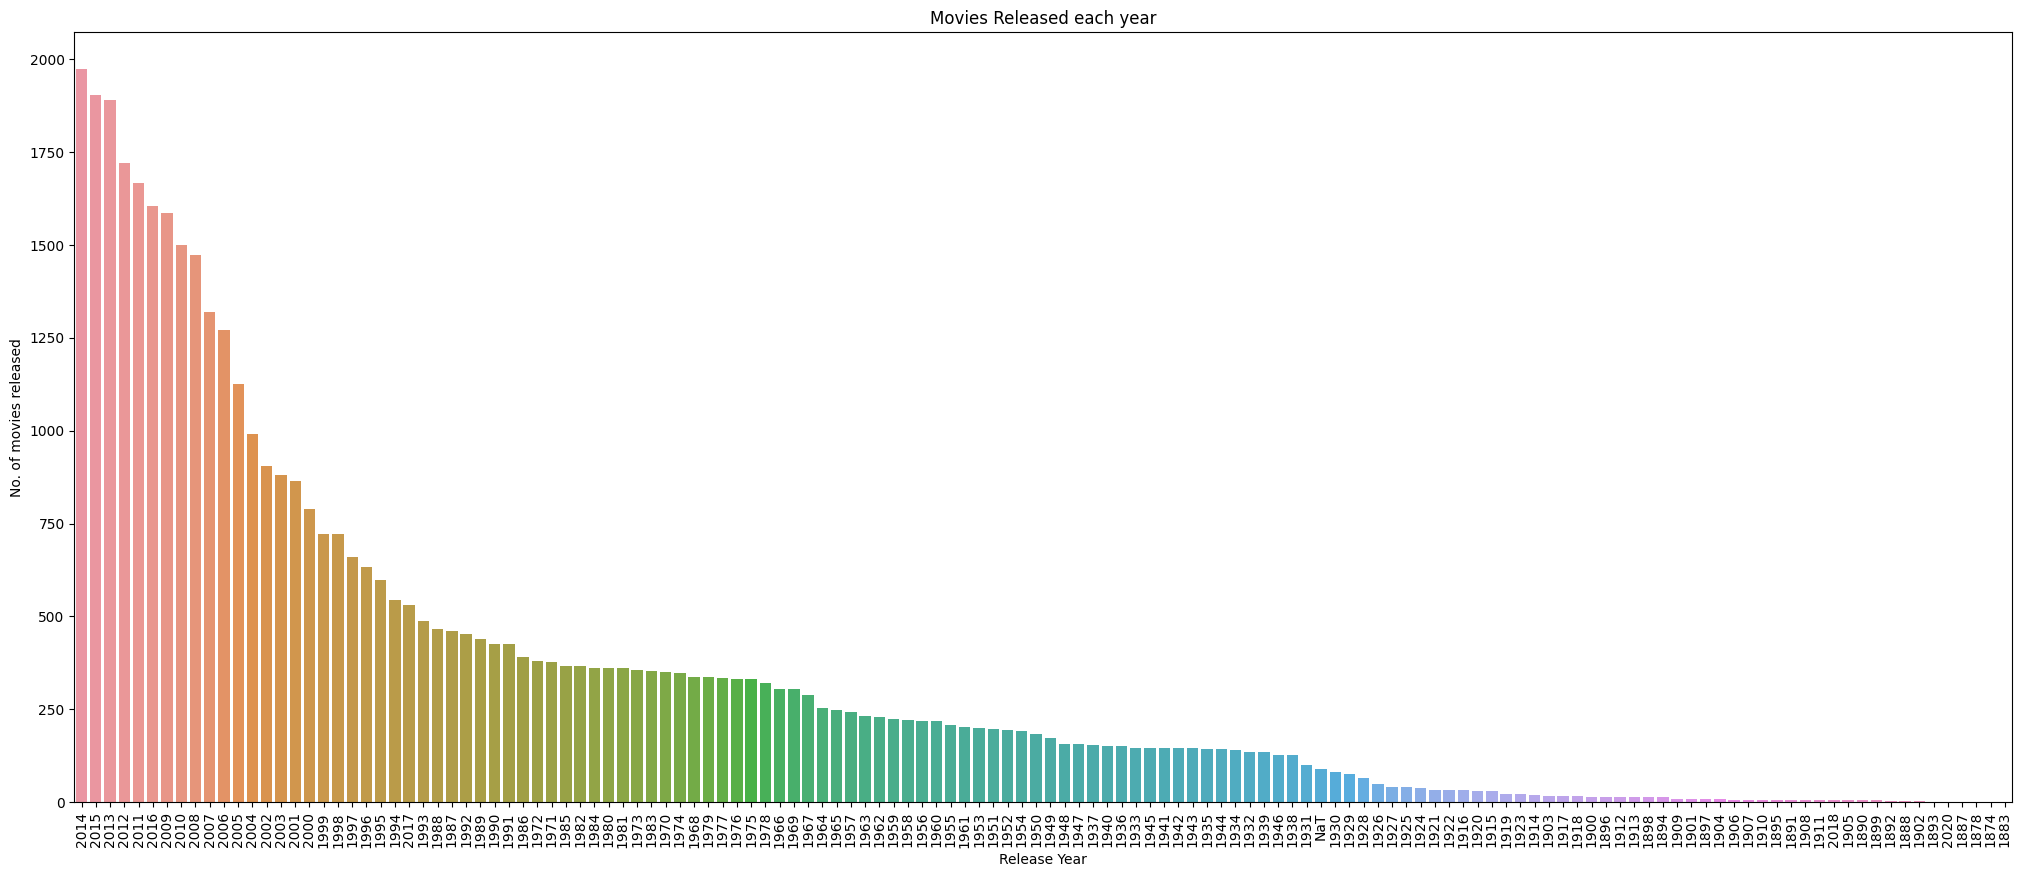

In [13]:
year_name = df1['year'].value_counts().index.tolist()
year_count = df1['year'].value_counts().tolist()

fig = plt.figure(figsize = (25, 10))
sns.barplot(x=year_name,y=year_count)
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('No. of movies released')
plt.title('Movies Released each year')
plt.show()


In [14]:
overview=df1['overview']

In [15]:
print("--- cleaning ---")
overview = re.sub(r'[^\w\s]', '', str(overview).lower().strip())
print(overview)
print("--- tokenization ---")
overview = overview.split()
print(overview)

--- cleaning ---
0        led by woody andys toys live happily in his 
1        when siblings judy and peter discover an encha
2        a family wedding reignites the ancient feud be
3        cheated on mistreated and stepped on the wom
4        just when george banks has recovered from his 
                                                       
45461          rising and falling between a man and woman
45462    an artist struggles to finish his work while a
45463    when one of her hits goes wrong a professiona
45464    in a small town live two brothers one a minis
45465    50 years after decriminalisation of homosexual
name overview length 45466 dtype object
--- tokenization ---
['0', 'led', 'by', 'woody', 'andys', 'toys', 'live', 'happily', 'in', 'his', '1', 'when', 'siblings', 'judy', 'and', 'peter', 'discover', 'an', 'encha', '2', 'a', 'family', 'wedding', 'reignites', 'the', 'ancient', 'feud', 'be', '3', 'cheated', 'on', 'mistreated', 'and', 'stepped', 'on', 'the', 'wom', '4', 'j

In [16]:
nltk.download('wordnet')

print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in overview])

--- lemmatisation ---


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0', 'led', 'by', 'woody', 'andys', 'toy', 'live', 'happily', 'in', 'his', '1', 'when', 'sibling', 'judy', 'and', 'peter', 'discover', 'an', 'encha', '2', 'a', 'family', 'wedding', 'reignites', 'the', 'ancient', 'feud', 'be', '3', 'cheated', 'on', 'mistreated', 'and', 'stepped', 'on', 'the', 'wom', '4', 'just', 'when', 'george', 'bank', 'ha', 'recovered', 'from', 'his', '45461', 'rising', 'and', 'falling', 'between', 'a', 'man', 'and', 'woman', '45462', 'an', 'artist', 'struggle', 'to', 'finish', 'his', 'work', 'while', 'a', '45463', 'when', 'one', 'of', 'her', 'hit', 'go', 'wrong', 'a', 'professiona', '45464', 'in', 'a', 'small', 'town', 'live', 'two', 'brother', 'one', 'a', 'mini', '45465', '50', 'year', 'after', 'decriminalisation', 'of', 'homosexual', 'name', 'overview', 'length', '45466', 'dtype', 'object']


In [17]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [18]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True):#, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

In [19]:
df1["overview_filtered"] = df1["overview"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True))#, lst_stopwords))
df1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,overview_filtered
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,led woody andys toy live happily room andys bi...
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,sibling judy peter discover enchanted board ga...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,family wedding reignites ancient feud nextdoor...
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,cheated mistreated stepped woman holding breat...
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,george bank recovered daughter wedding receive...


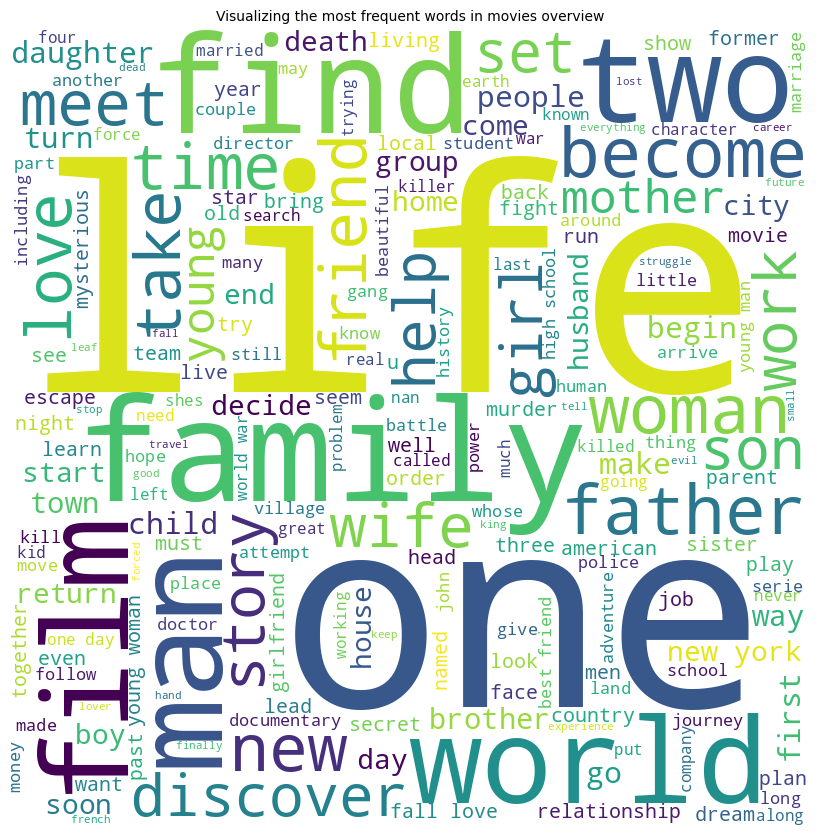

In [20]:
combined_text = ' '.join(df1['overview_filtered'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Visualizing the most frequent words in movies overview", fontsize=10)
plt.show()

In [21]:
from ast import literal_eval
df1['genres'] = df1['genres'].apply(literal_eval).apply(lambda x: [i['name'] for i in x]
                                                                   if isinstance(x, list) else [])

In [22]:
df1['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [23]:
# Step 1: Create the TfidfVectorizer with reduced vocabulary size and n-grams
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Step 2: Compute the TF-IDF matrix (using sparse format)
tfidf = vectorizer.fit_transform(df1['overview_filtered'])

# Step 3: Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=vectorizer.get_feature_names_out())

In [24]:
tfidf_df

,10,10 year,100,100 year,1000,10000,100000,10yearold,11,11 year,...,zack,zatoichi,zealand,zero,zhang,zijn,zoe,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
K_range = range(1, 15)  # Try different values of k from 1 to 15
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_df)
    inertia.append(kmeans.inertia_)

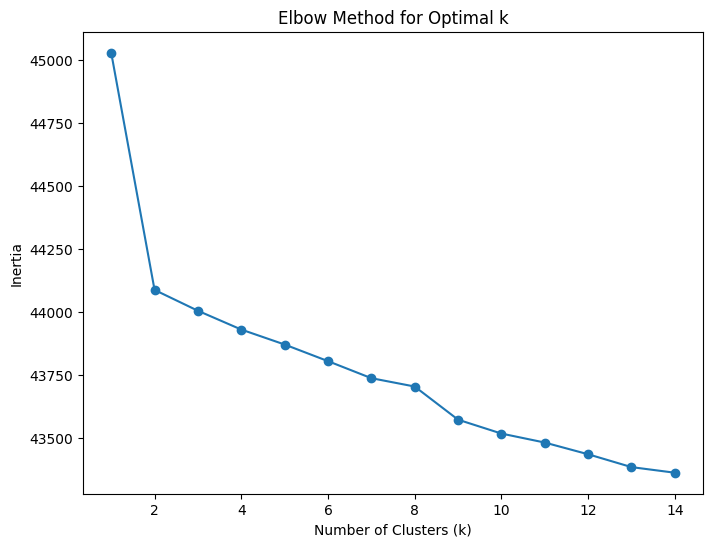

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the random seed
random_seed = 42
np.random.seed(random_seed)
# Initialize the KMeans model

num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters , random_state= random_seed)

# Fit the model to the data
kmeans.fit(tfidf_df)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

cluster_labels

array([3, 3, 8, ..., 3, 5, 7], dtype=int32)

In [28]:
# Print the unique cluster labels
unique_labels = pd.Series(cluster_labels).unique()
print(unique_labels)

[3 8 7 5 6 2 1 0 4]


In [29]:
cluster_DF = pd.DataFrame(cluster_labels)

In [30]:
merged = pd.concat([df1, cluster_DF ], axis=1)

In [31]:
column_name_mapping = {0: 'label'}
merged = merged.rename(columns=column_name_mapping)

In [32]:
merged.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,overview_filtered,label
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,led woody andys toy live happily room andys bi...,3
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,sibling judy peter discover enchanted board ga...,3
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,family wedding reignites ancient feud nextdoor...,8
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,cheated mistreated stepped woman holding breat...,7
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,george bank recovered daughter wedding receive...,5


In [33]:
random_sample_0 =  merged[merged["label"] == 0]
random_sample_1 =  merged[merged["label"] == 1]
random_sample_2 =  merged[merged["label"] == 2]
random_sample_3 =  merged[merged["label"] == 3]
random_sample_4 =  merged[merged["label"] == 4]
random_sample_5 =  merged[merged["label"] == 5]
random_sample_6 =  merged[merged["label"] == 6]
random_sample_7 =  merged[merged["label"] == 7]
random_sample_8 =  merged[merged["label"] == 8]

In [34]:
from collections import Counter
genres = list()
for genre in random_sample_0["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 893, 'War': 471, 'Action': 299, 'History': 210, 'Comedy': 193, 'Thriller': 183, 'Romance': 178, 'Adventure': 160, 'Documentary': 144, 'Science Fiction': 108, 'Western': 80, 'Crime': 58, 'Horror': 55, 'Fantasy': 55, 'Mystery': 44, 'Animation': 38, 'Foreign': 37, 'Family': 31, 'Music': 31, 'TV Movie': 21})


In [35]:
genres = list()
for genre in random_sample_1["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Comedy': 376, 'Drama': 242, 'Romance': 62, 'Documentary': 46, 'Thriller': 38, 'Crime': 38, 'Family': 38, 'Action': 31, 'Adventure': 26, 'Foreign': 23, 'Fantasy': 23, 'Science Fiction': 21, 'History': 19, 'Mystery': 16, 'TV Movie': 16, 'Animation': 15, 'Horror': 13, 'War': 13, 'Music': 10, 'Western': 7})


In [36]:
genres = list()
for genre in random_sample_2["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 550, 'Comedy': 461, 'Romance': 201, 'Horror': 133, 'Thriller': 124, 'Family': 102, 'Action': 98, 'Crime': 56, 'Documentary': 53, 'Fantasy': 41, 'Science Fiction': 41, 'Mystery': 40, 'Adventure': 36, 'Foreign': 36, 'Music': 35, 'Animation': 34, 'TV Movie': 27, 'History': 6, 'War': 3, 'Western': 1})


In [37]:
genres = list()
for genre in random_sample_3["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 7094, 'Comedy': 5313, 'Action': 4203, 'Thriller': 4060, 'Crime': 2455, 'Horror': 2369, 'Documentary': 2119, 'Adventure': 2112, 'Science Fiction': 2018, 'Romance': 1736, 'Mystery': 1260, 'Fantasy': 1119, 'Family': 1099, 'Animation': 1046, 'Music': 787, 'History': 711, 'Foreign': 612, 'Western': 580, 'War': 541, 'TV Movie': 337, 'Carousel Productions': 1, 'Vision View Entertainment': 1, 'Telescene Film Group Productions': 1, 'Aniplex': 1, 'GoHands': 1, 'BROSTA TV': 1, 'Mardock Scramble Production Committee': 1, 'Sentai Filmworks': 1, 'Odyssey Media': 1, 'Pulser Productions': 1, 'Rogue State': 1, 'The Cartel': 1})


In [38]:
genres = list()
for genre in random_sample_4["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 1478, 'Romance': 1212, 'Comedy': 841, 'Thriller': 186, 'Action': 181, 'Fantasy': 133, 'Music': 133, 'Foreign': 121, 'Crime': 118, 'Adventure': 103, 'Family': 83, 'History': 75, 'Science Fiction': 71, 'Horror': 64, 'Mystery': 51, 'War': 46, 'Documentary': 43, 'Animation': 42, 'TV Movie': 27, 'Western': 25})


In [39]:
genres = list()
for genre in random_sample_5["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 5818, 'Comedy': 3871, 'Romance': 2058, 'Thriller': 1768, 'Horror': 1122, 'Action': 1058, 'Family': 982, 'Crime': 901, 'Adventure': 666, 'Fantasy': 579, 'Mystery': 569, 'Animation': 502, 'Science Fiction': 467, 'Foreign': 436, 'Documentary': 408, 'Music': 316, 'TV Movie': 213, 'Western': 201, 'History': 144, 'War': 102})


In [40]:
genres = list()
for genre in random_sample_6["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 1144, 'Documentary': 906, 'Comedy': 637, 'Romance': 273, 'Action': 232, 'Thriller': 206, 'Horror': 192, 'Music': 184, 'Crime': 179, 'History': 149, 'Animation': 144, 'Adventure': 137, 'Foreign': 135, 'Science Fiction': 128, 'Fantasy': 116, 'Family': 106, 'Mystery': 94, 'War': 73, 'Western': 29, 'TV Movie': 24})


In [41]:
genres = list()
for genre in random_sample_7["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 1550, 'Romance': 707, 'Comedy': 696, 'Thriller': 623, 'Horror': 404, 'Crime': 282, 'Action': 250, 'Mystery': 248, 'Fantasy': 129, 'Science Fiction': 117, 'Adventure': 105, 'Foreign': 101, 'Documentary': 84, 'Western': 53, 'Music': 44, 'War': 43, 'History': 41, 'Family': 40, 'TV Movie': 35, 'Animation': 27})


In [42]:
genres = list()
for genre in random_sample_8["genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Drama': 1496, 'Comedy': 794, 'Thriller': 436, 'Horror': 321, 'Romance': 308, 'Family': 289, 'Action': 244, 'Crime': 220, 'Adventure': 151, 'Mystery': 145, 'Documentary': 129, 'Foreign': 121, 'Fantasy': 118, 'Animation': 87, 'Science Fiction': 78, 'TV Movie': 67, 'Western': 66, 'Music': 58, 'History': 43, 'War': 31})


In [43]:
merged.loc[merged["label"] == 0, "genres"] = "War"
merged.loc[merged["label"] == 1, "genres"] = "Crime"
merged.loc[merged["label"] == 2, "genres"] = "Horror"
merged.loc[merged["label"] == 3, "genres"] = "Drama"
merged.loc[merged["label"] == 4, "genres"] = "Romance"
merged.loc[merged["label"] == 5, "genres"] = "Comedy"
merged.loc[merged["label"] == 6, "genres"] = "Documentary"
merged.loc[merged["label"] == 7, "genres"] = "Thriller"
merged.loc[merged["label"] == 8, "genres"] = "Foreign"

In [44]:
merged.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,overview_filtered,label
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Drama,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,led woody andys toy live happily room andys bi...,3
1,False,NaN,65000000.0,Drama,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,sibling judy peter discover enchanted board ga...,3
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,Foreign,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,family wedding reignites ancient feud nextdoor...,8
3,False,NaN,16000000.0,Thriller,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,cheated mistreated stepped woman holding breat...,7
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,george bank recovered daughter wedding receive...,5


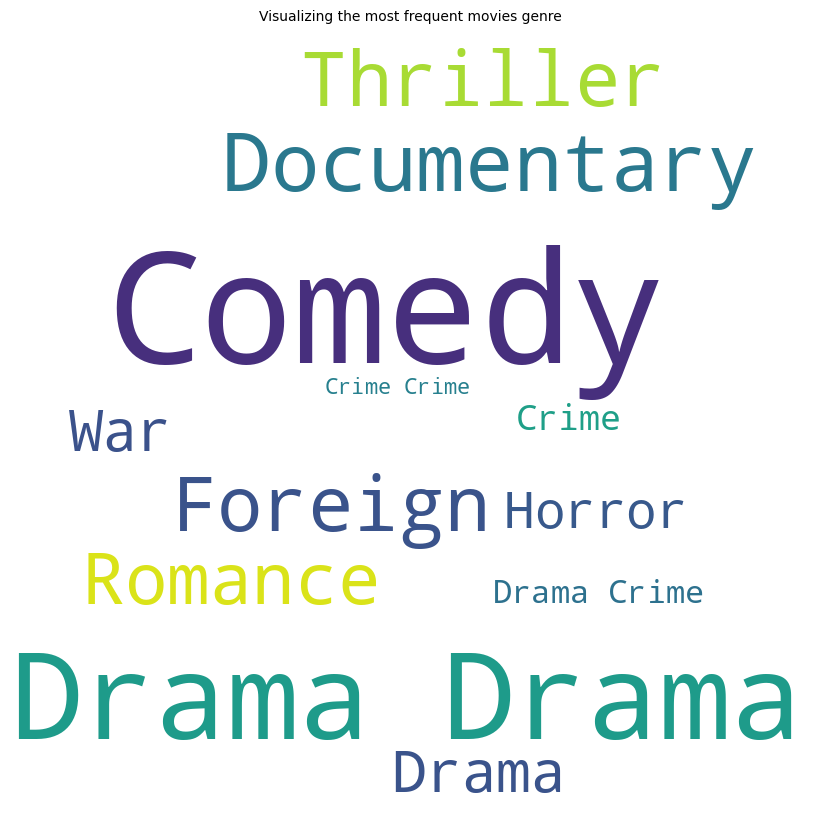

In [45]:
combined_text = ' '.join(merged['genres'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Visualizing the most frequent movies genre", fontsize=10)
plt.show()

In [46]:
all_genres = [genre for genres_list in merged["genres"] for genre in genres_list]

# Split the genres by comma and flatten the resulting lists
all_genres_split = [genre.strip() for genres in all_genres for genre in genres.split(',')]

# Count the occurrences of each genre after splitting
genre_values = pd.Series(all_genres_split)
genre_counts = pd.Series(all_genres_split).value_counts()

In [47]:
values=genre_counts
values=values.tolist()

In [48]:
keys=merged['genres'].unique()
keys

array(['Drama', 'Foreign', 'Thriller', 'Comedy', 'Documentary', 'Horror',
       'Crime', 'War', 'Romance'], dtype=object)

In [49]:
all_genres = dict(zip(keys, values))
all_genres

{'Drama': 46420,
 'Foreign': 37391,
 'Thriller': 36931,
 'Comedy': 23152,
 'Documentary': 22867,
 'Horror': 21723,
 'Crime': 14333,
 'War': 12145,
 'Romance': 11191}

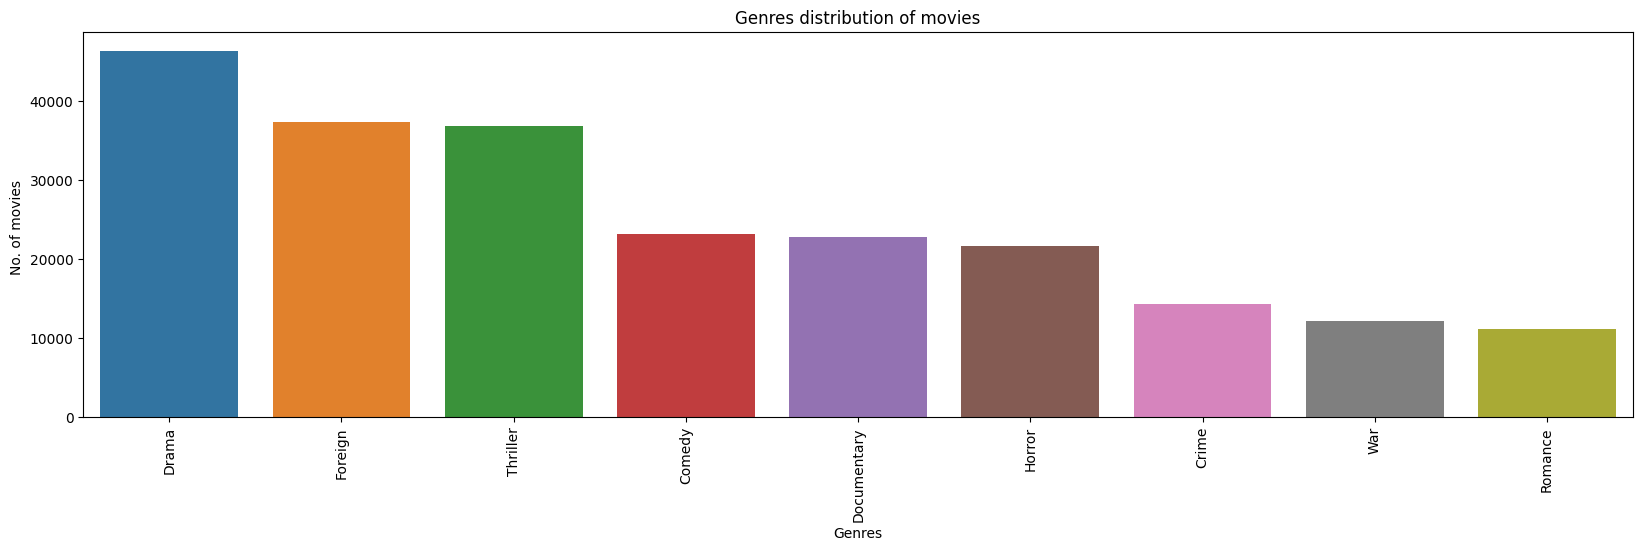

In [50]:
fig = plt.figure(figsize = (20, 5))
all_genre_keys = list(all_genres.keys())
all_genre_values = [int(i) for i in all_genres.values()]
sns.barplot(x=all_genre_keys, y = all_genre_values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('No. of movies ')
plt.title('Genres distribution of movies')
plt.show()

In [51]:
print(merged['label'].isnull().sum())

0


In [52]:
y = merged['label']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.3, shuffle = True, random_state = 0)

# Random Forest

In [54]:
rf = RandomForestClassifier()
rf_train = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import accuracy_score , classification_report
test_accuracy = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test,y_pred_rf)
print("Random Forest accuracy : ",test_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest accuracy :  0.8834310850439883
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       426
           1       1.00      1.00      1.00       311
           2       0.98      0.82      0.90       364
           3       0.88      0.95      0.91      5955
           4       0.94      0.84      0.88       694
           5       0.81      0.80      0.81      3301
           6       0.93      0.88      0.90       915
           7       0.95      0.84      0.89       816
           8       0.96      0.81      0.88       858

    accuracy                           0.88     13640
   macro avg       0.93      0.87      0.90     13640
weighted avg       0.89      0.88      0.88     13640



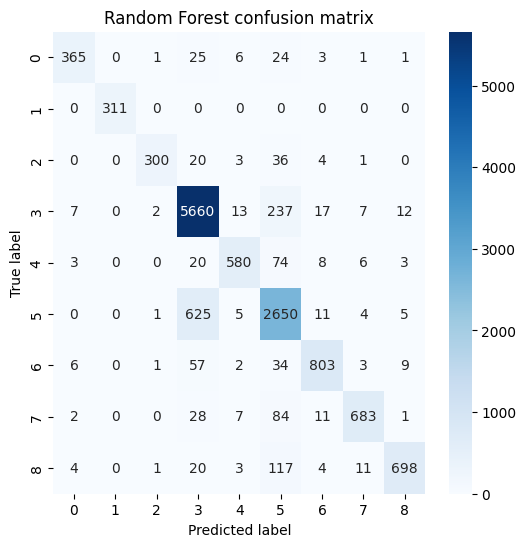

In [55]:
plot_confusion_matrix(rf_cm, "Random Forest confusion matrix")

# Naive Bayes


In [56]:
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6538123167155425
              precision    recall  f1-score   support

           0       1.00      0.20      0.34       426
           1       1.00      1.00      1.00       311
           2       1.00      0.13      0.23       364
           3       0.67      0.92      0.78      5955
           4       0.91      0.12      0.22       694
           5       0.55      0.74      0.63      3301
           6       0.88      0.36      0.51       915
           7       0.93      0.10      0.17       816
           8       1.00      0.08      0.15       858

    accuracy                           0.65     13640
   macro avg       0.88      0.41      0.45     13640
weighted avg       0.73      0.65      0.60     13640



In [57]:
nb_cm=confusion_matrix(y_test,y_pred_nb)

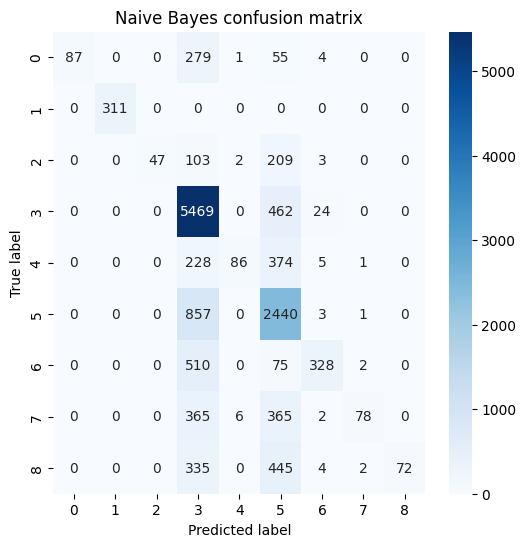

In [58]:
plot_confusion_matrix(nb_cm, "Naive Bayes confusion matrix")

# Gradient Descent

In [59]:
sgd_tfidf = SGDClassifier(loss='log')
sgd_tfidf.fit(X_train, y_train)
y_pred_gd = sgd_tfidf.predict(X_test)
# Evaluate the model's performance
accuracy_gd = accuracy_score(y_test, y_pred_gd)
classification_rep = classification_report(y_test, y_pred_gd)
print("Stochastic Gradient Descent accuracy : ",accuracy_gd)
print(classification_rep)

Stochastic Gradient Descent accuracy :  0.8676686217008798
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       426
           1       1.00      1.00      1.00       311
           2       1.00      0.61      0.76       364
           3       0.82      1.00      0.90      5955
           4       0.97      0.68      0.80       694
           5       0.85      0.83      0.84      3301
           6       0.98      0.74      0.84       915
           7       0.98      0.73      0.84       816
           8       0.99      0.70      0.82       858

    accuracy                           0.87     13640
   macro avg       0.96      0.77      0.84     13640
weighted avg       0.88      0.87      0.86     13640



In [60]:
gd_cm=confusion_matrix(y_test,y_pred_gd)

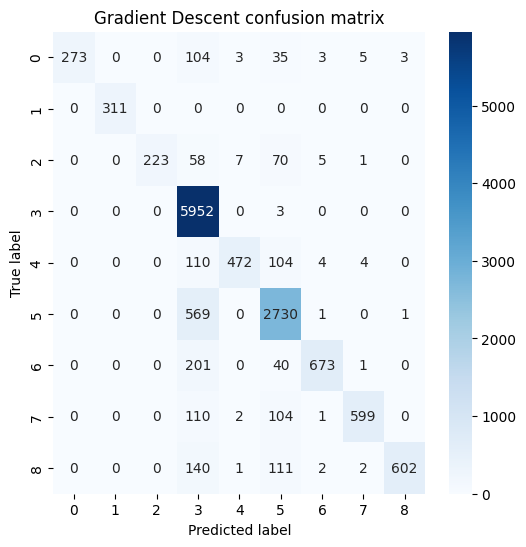

In [61]:
plot_confusion_matrix(gd_cm, "Gradient Descent confusion matrix")

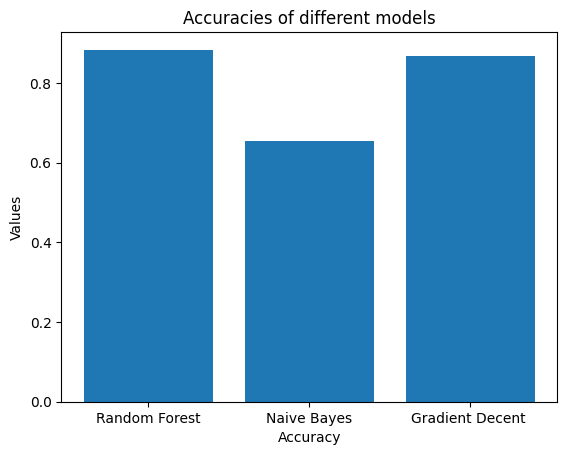

In [62]:
categories = ['Random Forest', 'Naive Bayes', 'Gradient Decent ']
values = [test_accuracy,accuracy_nb,accuracy_gd]

plt.bar(categories, values)

plt.xlabel('Accuracy')
plt.ylabel('Values')
plt.title('Accuracies of different models')

plt.show()

In [63]:
with open("tfidf.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [64]:
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

In [65]:
merged.to_csv('merged.csv', index=False)

In [66]:
vote_counts = merged[merged['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = merged[merged['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [67]:
m = vote_counts.quantile(0.95)
m

434.0

In [68]:
qualified = merged[(merged['vote_count'] >= m) & (merged['vote_count'].notnull()) & (merged['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres','overview']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 7)

In [69]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [70]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)
qualified = qualified.sort_values('wr', ascending=False).head(250)
qualified

,title,year,vote_count,vote_average,popularity,genres,overview,wr
15480,Inception,2010,14075,8,29.108149,Comedy,"Cobb, a skilled thief who commits corporate es...",7.917588
12481,The Dark Knight,2008,12269,8,123.167259,Drama,Batman raises the stakes in his war on crime. ...,7.905871
22879,Interstellar,2014,11187,8,32.213481,Drama,Interstellar chronicles the adventures of a gr...,7.897107
2843,Fight Club,1999,9678,8,63.869599,Drama,A ticking-time-bomb insomniac and a slippery s...,7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,Drama,"Young hobbit Frodo Baggins, after inheriting a...",7.871787
...,...,...,...,...,...,...,...,...
2006,Indiana Jones and the Temple of Doom,1984,2841,7,15.802306,Drama,"After arriving in India, Indiana Jones is aske...",6.767415
16129,The King's Speech,2010,2817,7,11.260387,War,The King's Speech tells the story of the man w...,6.765698
895,Sunset Boulevard,1950,533,8,11.709777,Drama,A hack screenwriter writes a screenplay for a ...,6.763480
9888,Sin City,2005,2755,7,15.010525,Drama,Welcome to Sin City. This town beckons to the ...,6.761143


In [71]:
s = merged.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen = merged.drop('genres', axis=1).join(s)

In [72]:
def build_chart(genre, percentile=0.85):
    df = gen[gen['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)

    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')

    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)

    return qualified

In [73]:
qualified

,title,year,vote_count,vote_average,popularity,genres,overview,wr
15480,Inception,2010,14075,8,29.108149,Comedy,"Cobb, a skilled thief who commits corporate es...",7.917588
12481,The Dark Knight,2008,12269,8,123.167259,Drama,Batman raises the stakes in his war on crime. ...,7.905871
22879,Interstellar,2014,11187,8,32.213481,Drama,Interstellar chronicles the adventures of a gr...,7.897107
2843,Fight Club,1999,9678,8,63.869599,Drama,A ticking-time-bomb insomniac and a slippery s...,7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,Drama,"Young hobbit Frodo Baggins, after inheriting a...",7.871787
...,...,...,...,...,...,...,...,...
2006,Indiana Jones and the Temple of Doom,1984,2841,7,15.802306,Drama,"After arriving in India, Indiana Jones is aske...",6.767415
16129,The King's Speech,2010,2817,7,11.260387,War,The King's Speech tells the story of the man w...,6.765698
895,Sunset Boulevard,1950,533,8,11.709777,Drama,A hack screenwriter writes a screenplay for a ...,6.763480
9888,Sin City,2005,2755,7,15.010525,Drama,Welcome to Sin City. This town beckons to the ...,6.761143


In [74]:
build_chart('Drama')

,title,year,vote_count,vote_average,popularity,wr
12481,The Dark Knight,2008,12269,8,123.167259,7.977194
22879,Interstellar,2014,11187,8,32.213481,7.975008
2843,Fight Club,1999,9678,8,63.869599,7.971152
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,7.968630
292,Pulp Fiction,1994,8670,8,140.950236,7.967836
...,...,...,...,...,...,...
2676,Airplane!,1980,1104,7,13.063203,6.849702
6185,Identity,2003,1090,7,17.955897,6.847936
1291,Dracula,1992,1087,7,16.777675,6.847552
3378,Misery,1990,1085,7,15.020845,6.847295


In [75]:
overview = qualified['overview']
overview

15480    Cobb, a skilled thief who commits corporate es...
12481    Batman raises the stakes in his war on crime. ...
22879    Interstellar chronicles the adventures of a gr...
2843     A ticking-time-bomb insomniac and a slippery s...
4863     Young hobbit Frodo Baggins, after inheriting a...
                               ...                        
2006     After arriving in India, Indiana Jones is aske...
16129    The King's Speech tells the story of the man w...
895      A hack screenwriter writes a screenplay for a ...
9888     Welcome to Sin City. This town beckons to the ...
16833    Decorated soldier Captain Colter Stevens wakes...
Name: overview, Length: 250, dtype: object

In [76]:
overview = re.sub(r'[^\w\s]', '', str(overview).lower().strip())
overview

'15480    cobb a skilled thief who commits corporate es\n12481    batman raises the stakes in his war on crime \n22879    interstellar chronicles the adventures of a gr\n2843     a tickingtimebomb insomniac and a slippery s\n4863     young hobbit frodo baggins after inheriting a\n                                                       \n2006     after arriving in india indiana jones is aske\n16129    the kings speech tells the story of the man w\n895      a hack screenwriter writes a screenplay for a \n9888     welcome to sin city this town beckons to the \n16833    decorated soldier captain colter stevens wakes\nname overview length 250 dtype object'

In [77]:
overview = overview.split()
overview

['15480',
 'cobb',
 'a',
 'skilled',
 'thief',
 'who',
 'commits',
 'corporate',
 'es',
 '12481',
 'batman',
 'raises',
 'the',
 'stakes',
 'in',
 'his',
 'war',
 'on',
 'crime',
 '22879',
 'interstellar',
 'chronicles',
 'the',
 'adventures',
 'of',
 'a',
 'gr',
 '2843',
 'a',
 'tickingtimebomb',
 'insomniac',
 'and',
 'a',
 'slippery',
 's',
 '4863',
 'young',
 'hobbit',
 'frodo',
 'baggins',
 'after',
 'inheriting',
 'a',
 '2006',
 'after',
 'arriving',
 'in',
 'india',
 'indiana',
 'jones',
 'is',
 'aske',
 '16129',
 'the',
 'kings',
 'speech',
 'tells',
 'the',
 'story',
 'of',
 'the',
 'man',
 'w',
 '895',
 'a',
 'hack',
 'screenwriter',
 'writes',
 'a',
 'screenplay',
 'for',
 'a',
 '9888',
 'welcome',
 'to',
 'sin',
 'city',
 'this',
 'town',
 'beckons',
 'to',
 'the',
 '16833',
 'decorated',
 'soldier',
 'captain',
 'colter',
 'stevens',
 'wakes',
 'name',
 'overview',
 'length',
 '250',
 'dtype',
 'object']

In [78]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in overview])

['15480', 'cobb', 'a', 'skilled', 'thief', 'who', 'commits', 'corporate', 'e', '12481', 'batman', 'raise', 'the', 'stake', 'in', 'his', 'war', 'on', 'crime', '22879', 'interstellar', 'chronicle', 'the', 'adventure', 'of', 'a', 'gr', '2843', 'a', 'tickingtimebomb', 'insomniac', 'and', 'a', 'slippery', 's', '4863', 'young', 'hobbit', 'frodo', 'baggins', 'after', 'inheriting', 'a', '2006', 'after', 'arriving', 'in', 'india', 'indiana', 'jones', 'is', 'aske', '16129', 'the', 'king', 'speech', 'tell', 'the', 'story', 'of', 'the', 'man', 'w', '895', 'a', 'hack', 'screenwriter', 'writes', 'a', 'screenplay', 'for', 'a', '9888', 'welcome', 'to', 'sin', 'city', 'this', 'town', 'beckons', 'to', 'the', '16833', 'decorated', 'soldier', 'captain', 'colter', 'stevens', 'wake', 'name', 'overview', 'length', '250', 'dtype', 'object']


In [80]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True):#, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

In [81]:
qualified["overview"] = qualified["overview"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True))#, lst_stopwords))
qualified

,title,year,vote_count,vote_average,popularity,genres,overview,wr
15480,Inception,2010,14075,8,29.108149,Comedy,cobb skilled thief commits corporate espionage...,7.917588
12481,The Dark Knight,2008,12269,8,123.167259,Drama,batman raise stake war crime help lt jim gordo...,7.905871
22879,Interstellar,2014,11187,8,32.213481,Drama,interstellar chronicle adventure group explore...,7.897107
2843,Fight Club,1999,9678,8,63.869599,Drama,tickingtimebomb insomniac slippery soap salesm...,7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,Drama,young hobbit frodo baggins inheriting mysterio...,7.871787
...,...,...,...,...,...,...,...,...
2006,Indiana Jones and the Temple of Doom,1984,2841,7,15.802306,Drama,arriving india indiana jones asked desperate v...,6.767415
16129,The King's Speech,2010,2817,7,11.260387,War,king speech tell story man became king george ...,6.765698
895,Sunset Boulevard,1950,533,8,11.709777,Drama,hack screenwriter writes screenplay former sil...,6.763480
9888,Sin City,2005,2755,7,15.010525,Drama,welcome sin city town beckons tough corrupt br...,6.761143


# Recommendation (Type Based Recommender)

In [82]:
def build_chart(genre, percentile=0.85):
    df = gen[gen['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)

    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')

    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)

    return qualified

In [83]:
build_chart("Drama")

,title,year,vote_count,vote_average,popularity,wr
12481,The Dark Knight,2008,12269,8,123.167259,7.977194
22879,Interstellar,2014,11187,8,32.213481,7.975008
2843,Fight Club,1999,9678,8,63.869599,7.971152
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,7.968630
292,Pulp Fiction,1994,8670,8,140.950236,7.967836
...,...,...,...,...,...,...
2676,Airplane!,1980,1104,7,13.063203,6.849702
6185,Identity,2003,1090,7,17.955897,6.847936
1291,Dracula,1992,1087,7,16.777675,6.847552
3378,Misery,1990,1085,7,15.020845,6.847295


In [84]:
build_chart("Comedy")

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.983705
314,The Shawshank Redemption,1994,8358,8,51.645403,7.972671
1225,Back to the Future,1985,6239,8,25.778509,7.963514
359,The Lion King,1994,5520,8,21.605761,7.958833
18465,The Intouchables,2011,5410,8,16.086919,7.958009
...,...,...,...,...,...,...
25041,When Marnie Was There,2014,345,7,9.342061,6.661069
5341,Z,1969,87,8,11.943621,6.658486
17127,The Man from Nowhere,2010,338,7,9.023244,6.655460
2966,All About My Mother,1999,337,7,10.000915,6.654644


# Recommendation (Overview Based Recommender)

In [85]:
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
links_small

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int64

In [86]:
merged = merged.drop([19730, 29503, 35587])

In [87]:
merged['id'] = merged['id'].astype('int')
sim = merged[merged['id'].isin(links_small)]
sim

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,overview_filtered,label
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Drama,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,led woody andys toy live happily room andys bi...,3
1,False,NaN,65000000.0,Drama,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,sibling judy peter discover enchanted board ga...,3
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,Foreign,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,family wedding reignites ancient feud nextdoor...,8
3,False,NaN,16000000.0,Thriller,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,cheated mistreated stepped woman holding breat...,7
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,george bank recovered daughter wedding receive...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40224,False,NaN,15000000.0,Drama,NaN,315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,...,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016,mind behind evangelion come hit larger life ma...,3
40503,False,NaN,0.0,Drama,http://www.thebeatlesliveproject.com/,391698,tt2531318,en,The Beatles: Eight Days a Week - The Touring Y...,"The band stormed Europe in 1963, and, in 1964,...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The band you know. The story you don't.,The Beatles: Eight Days a Week - The Touring Y...,False,7.6,92.0,2016,band stormed europe 1963 1964 conquered americ...,3
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000.0,Comedy,http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0,2000,molly hale sadness father disappearance get un...,5
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0.0,Drama,http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0,2001,favorite pokémon character back joined first t...,3


In [88]:
sim['tagline'] = sim['tagline'].fillna('')
sim['description'] = sim['overview'] + sim['tagline']
sim['description'] = sim['description'].fillna('')
sim

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,year,overview_filtered,label,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Drama,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,,Toy Story,False,7.7,5415.0,1995,led woody andys toy live happily room andys bi...,3,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000.0,Drama,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,sibling judy peter discover enchanted board ga...,3,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,Foreign,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,family wedding reignites ancient feud nextdoor...,8,A family wedding reignites the ancient feud be...
3,False,NaN,16000000.0,Thriller,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,cheated mistreated stepped woman holding breat...,7,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,george bank recovered daughter wedding receive...,5,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40224,False,NaN,15000000.0,Drama,NaN,315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,...,Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016,mind behind evangelion come hit larger life ma...,3,From the mind behind Evangelion comes a hit la...
40503,False,NaN,0.0,Drama,http://www.thebeatlesliveproject.com/,391698,tt2531318,en,The Beatles: Eight Days a Week - The Touring Y...,"The band stormed Europe in 1963, and, in 1964,...",...,Released,The band you know. The story you don't.,The Beatles: Eight Days a Week - The Touring Y...,False,7.6,92.0,2016,band stormed europe 1963 1964 conquered americ...,3,"The band stormed Europe in 1963, and, in 1964,..."
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000.0,Comedy,http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0,2000,molly hale sadness father disappearance get un...,5,When Molly Hale's sadness of her father's disa...
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0.0,Drama,http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,Released,,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0,2001,favorite pokémon character back joined first t...,3,"All your favorite Pokémon characters are back,..."


In [89]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(sim['description'])
tfidf_matrix.shape

(9099, 268124)

In [90]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarity

array([[1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
        0.        ],
       [0.00680476, 1.        , 0.01531062, ..., 0.00357057, 0.00762326,
        0.        ],
       [0.        , 0.01531062, 1.        , ..., 0.        , 0.00286535,
        0.00472155],
       ...,
       [0.        , 0.00357057, 0.        , ..., 1.        , 0.07811616,
        0.        ],
       [0.00344913, 0.00762326, 0.00286535, ..., 0.07811616, 1.        ,
        0.        ],
       [0.        , 0.        , 0.00472155, ..., 0.        , 0.        ,
        1.        ]])

In [91]:
sim = sim.reset_index()
titles = sim['title']
indices = pd.Series(sim.index, index=sim['title'])

# Recommendation Function

In [92]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [93]:
get_recommendations('Fight Club').head(10)

4070                             Delirious
980                            Raging Bull
8200                 Poor Little Rich Girl
3662                                   UHF
8718                       The Borderlands
6901                       Never Back Down
302            What's Eating Gilbert Grape
8219                             Role/Play
6124                             Unleashed
6979    Z Channel: A Magnificent Obsession
Name: title, dtype: object

# Recommendation (Ratings Based Recommender)

In [94]:
def rating_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]

    movies = sim.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [95]:
rating_recommendations('Fight Club')

,title,vote_count,vote_average,year,wr
1333,The Truman Show,4702,7,1998,6.851691
980,Raging Bull,968,7,1980,6.456694
302,What's Eating Gilbert Grape,943,7,1993,6.446830
7990,Project X,1624,6,2012,5.840761
6124,Unleashed,531,6,2005,5.660399
6901,Never Back Down,511,6,2008,5.653212
5891,The Hole,227,6,2001,5.504214
373,Blown Away,126,6,1994,5.414795
1537,Friday the 13th: A New Beginning,200,5,1985,5.167642
3433,The Animal,310,4,2001,4.726190


# Collaborative Filtering

In [105]:
reader = Reader(rating_scale=(0.5, 5))

In [106]:
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [107]:
dataset = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [108]:
algo = SVD()
results = cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9022  0.8995  0.8897  0.8948  0.9001  0.8973  0.0045  
MAE (testset)     0.6937  0.6923  0.6847  0.6916  0.6933  0.6911  0.0033  
Fit time          1.41    1.40    1.41    1.42    2.04    1.53    0.25    
Test time         0.14    0.12    0.20    0.67    0.22    0.27    0.20    


In [110]:
from surprise.model_selection import train_test_split
# Split the data into train and test sets
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

In [111]:
algo.fit(trainset)
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [112]:
algo.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.750143202597585, details={'was_impossible': False})

# Multi Recommedation

In [113]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [114]:
id_map = pd.read_csv('links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(sim[['title', 'id']], on='id').set_index('title')
indices_map = id_map.set_index('id')

In [115]:
def multi_recommend(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']

    sim_scores = list(enumerate(cosine_similarity[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]

    movies = sim.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: algo.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [116]:
multi_recommend(3 , "Fight Club")

,title,vote_count,vote_average,year,id,est
980,Raging Bull,968.0,7.7,1980,1578,4.162289
1333,The Truman Show,4702.0,7.8,1998,37165,3.801636
5891,The Hole,227.0,6.4,2001,467,3.572200
302,What's Eating Gilbert Grape,943.0,7.5,1993,1587,3.566996
6124,Unleashed,531.0,6.6,2005,10027,3.538634
3662,UHF,90.0,6.7,1989,11959,3.536845
4070,Delirious,27.0,5.5,1991,28117,3.519713
4147,Perfect,32.0,3.9,1985,49370,3.480628
6038,Bunny Lake Is Missing,35.0,6.6,1965,1942,3.460882
6901,Never Back Down,511.0,6.5,2008,8456,3.417194
